# Last FM hometask <br>
https://www.kaggle.com/ravichaubey1506/lastfm <br>
1. Выбрать данные по странам своей группы (совместно): <br>
    3530203_70101: Germany, Netherlands <br>
    3530203_70102: Belarus, Ukraine, Poland, Russian Federation<br>
    3530903_70301: Sweden, Finland, Norway, Denmark, Iceland<br>
    3530903_70302: Spain, Portugal, France, Italy, Belgium<br>
    
2. Попытаться найти полезные с точки зрения продвижения групп (или еще чего-нибудь) и нетривиальные правила, используя алгоритмы Apriori, FPGrowth, FPMax и всевозможные метрики. Хотя бы 5 правил.
3. Вывести эти правила в отдельных ячейках. 
4. Подумать, как можно было бы использовать полученные правила.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("lastfm.csv")
data = data[(data["country"]=="Sweden") | (data["country"]=="Finland")|(data["country"]=="Norway")| (data["country"]=="Denmark")| (data["country"]=="Iceland")]
data

,user,artist,sex,country
72,5,dream theater,m,Finland
73,5,ac/dc,m,Finland
74,5,metallica,m,Finland
75,5,iron maiden,m,Finland
76,5,bob marley & the wailers,m,Finland
...,...,...,...,...
288243,19607,sonic youth,m,Norway
288244,19607,devo,m,Norway
288245,19607,cut copy,m,Norway
288246,19607,arctic monkeys,m,Norway


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30268 entries, 72 to 288247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     30268 non-null  int64 
 1   artist   30268 non-null  object
 2   sex      30268 non-null  object
 3   country  30268 non-null  object
dtypes: int64(1), object(3)
memory usage: 827.6+ KB


In [4]:
data = data.drop(data[data['artist']=='[unknown]'].index)

### Data preprocessing

In [5]:
grouping_data = data.groupby(['user','country','sex'])['artist'].apply(lambda x: ','.join(x)).reset_index()
grouping_data

,user,country,sex,artist
0,5,Finland,m,"dream theater,ac/dc,metallica,iron maiden,bob ..."
1,7,Finland,m,"soundgarden,stone temple pilots,buckethead,dre..."
2,19,Sweden,f,"the kills,a perfect circle,crystal castles,bec..."
3,28,Sweden,m,"toto,the doors,kent,the smiths,pink floyd,sex ..."
4,48,Norway,m,"as i lay dying,skillet,atreyu,bullet for my va..."
...,...,...,...,...
1429,19582,Norway,m,"the doors,gorillaz,ayreon,queens of the stone ..."
1430,19586,Sweden,m,"bad religion,millencolin,the hives,foo fighter..."
1431,19587,Denmark,m,"depeche mode,n*e*r*d,radiohead,snow patrol,the..."
1432,19605,Sweden,f,"jens lekman,kings of convenience,the smiths,of..."


In [6]:
#grouping_data['country'].value_counts()

### Dummy encoding 

In [7]:
data_dummy = pd.concat([
    grouping_data.drop(['country', 'sex', 'artist'], axis=1),
    grouping_data['artist'].str.get_dummies(','),
    pd.get_dummies(grouping_data['sex']), 
    pd.get_dummies(grouping_data['country'])
    ], axis = 1).set_index(['user'])

data_dummy.head(10)

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,a day to remember,...,yo la tengo,zero 7,Édith piaf,f,m,Denmark,Finland,Iceland,Norway,Sweden
user,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
85,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Extract rules with Mlxtend (machine learning extensions)
Python library of useful tools for the day-to-day data science tasks.

http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/

### Find frequent itemsets and rules


In [8]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_itemsets_fpgrowth =  fpgrowth(data_dummy, min_support=0.021, use_colnames=True)

frequent_itemsets_fpgrowth

,support,itemsets
0,0.768480,(m)
1,0.355649,(Finland)
2,0.164575,(metallica)
3,0.133194,(nightwish)
4,0.092050,(iron maiden)
...,...,...
1173,0.030683,"(stratovarius, m)"
1174,0.023013,"(stratovarius, Finland)"
1175,0.025802,"(helloween, m)"
1176,0.027197,"(fatboy slim, m)"


In [9]:
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.0001)
rules_fpgrowth

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Finland),(m),0.355649,0.768480,0.273361,0.768627,1.000192,0.000053,1.000638
1,(m),(Finland),0.768480,0.355649,0.273361,0.355717,1.000192,0.000053,1.000106
2,(metallica),(m),0.164575,0.768480,0.147141,0.894068,1.163424,0.020669,2.185551
3,(m),(metallica),0.768480,0.164575,0.147141,0.191470,1.163424,0.020669,1.033265
4,(Finland),(metallica),0.355649,0.164575,0.076709,0.215686,1.310568,0.018178,1.065167
...,...,...,...,...,...,...,...,...,...
2637,(m),(helloween),0.768480,0.028591,0.025802,0.033575,1.174317,0.003830,1.005157
2638,(fatboy slim),(m),0.027894,0.768480,0.027197,0.975000,1.268739,0.005761,9.260809
2639,(m),(fatboy slim),0.768480,0.027894,0.027197,0.035390,1.268739,0.005761,1.007771
2640,(m),(avenged sevenfold),0.768480,0.029986,0.023013,0.029946,0.998649,-0.000031,0.999958


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets_apriori =  apriori(data_dummy,min_support=0.021, use_colnames=True)

frequent_itemsets_apriori

,support,itemsets
0,0.034170,(2pac)
1,0.040446,(3 doors down)
2,0.039749,(30 seconds to mars)
3,0.038354,(50 cent)
4,0.042538,(a perfect circle)
...,...,...
1173,0.022315,"(Finland, metallica, m, children of bodom)"
1174,0.023013,"(nightwish, Finland, m, children of bodom)"
1175,0.026499,"(Finland, metallica, m, in flames)"
1176,0.023710,"(Finland, nightwish, m, in flames)"


In [11]:
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.0001)
rules_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2pac),(m),0.034170,0.768480,0.029986,0.877551,1.141931,0.003727,1.890748
1,(m),(2pac),0.768480,0.034170,0.029986,0.039020,1.141931,0.003727,1.005047
2,(3 doors down),(m),0.040446,0.768480,0.032078,0.793103,1.032042,0.000996,1.119014
3,(m),(3 doors down),0.768480,0.040446,0.032078,0.041742,1.032042,0.000996,1.001352
4,(50 cent),(m),0.038354,0.768480,0.032078,0.836364,1.088335,0.002604,1.414846
...,...,...,...,...,...,...,...,...,...
2637,"(metallica, m)","(Finland, nightwish)",0.147141,0.076709,0.026499,0.180095,2.347781,0.015212,1.126095
2638,(nightwish),"(Finland, metallica, m)",0.133194,0.068340,0.026499,0.198953,2.911208,0.017397,1.163052
2639,(Finland),"(nightwish, metallica, m)",0.355649,0.041144,0.026499,0.074510,1.810967,0.011867,1.036052
2640,(metallica),"(Finland, nightwish, m)",0.164575,0.063459,0.026499,0.161017,2.537344,0.016056,1.116281


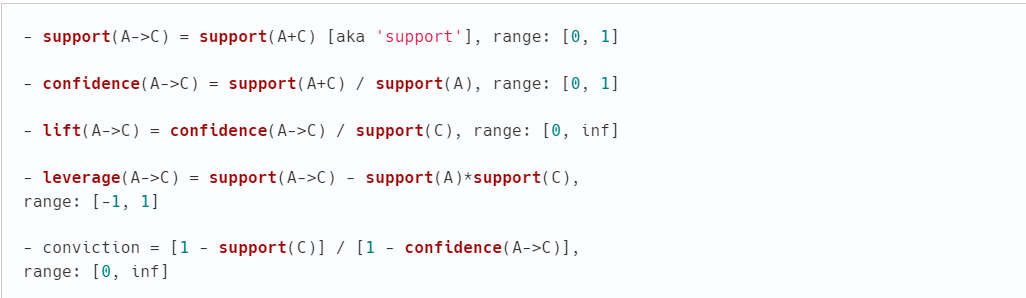

support -  это показатель, насколько часто набор объектов обнаруживается в базе данных.

confidence - если она равна 1, то можно трактовать так: в 100 % случаев, когда покупается масло и хлеб, обязательно покупается молоко

lift - 

Если правило имеет лифт 1, это означает, что событие в левой части независимо от события в правой части. Если два события независимы, никакого правила нельзя вытащить из этих двух событий.

Если лифт > 1, это позволяет нам знать степень, насколько события связаны друг с другом, и делает эти правила потенциально полезными для предсказания следствия в будущих наборах данных.

Если лифт < 1, это означает, что объекты заменяют друг друга. Это означает, что наличие одного объекта имеет отрицательный эффект на присутствие второго объекта, и наоборот.

conviction -

правило {молоко, хлеб} => {масло} имеет уверенность 1.2 и может пониматься как отношение ожидаемой частоты, что X встречается без Y (говоря иначе, частота, что правило даёт неправильное предсказание), если бы X и Y были бы независимыми, и наблюдаемой частоты неверных предсказаний. В этом примере значение уверенности 1,2 показывает, что правило {молоко, хлеб} => {масло} будет неверным на 20 % чаще (в 1,2 раз чаще), если ассоциация между X и Y была чистой случайностью.

leverage - Это разница между наблюдаемой частотой A + C и частотой, которую можно было бы ожидать, если бы A и C были независимыми.


### Правило 1
Считается ли группа Металика чисто мужской группой?

In [12]:
def man_music(rules):
    return rules[(rules['antecedents'] == {'metallica'})&(rules['consequents']=={'m'})].sort_values(by='lift', ascending=False)

def woman_music(rules):
    return rules[(rules['antecedents'] == {'metallica'})&(rules['consequents']=={'f'})].sort_values(by='lift', ascending=False)

In [13]:
man_music(rules_apriori)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
780,(metallica),(m),0.164575,0.76848,0.147141,0.894068,1.163424,0.020669,2.185551


In [14]:
man_music(rules_fpgrowth)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(metallica),(m),0.164575,0.76848,0.147141,0.894068,1.163424,0.020669,2.185551


In [15]:
woman_music(rules_apriori)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Из этого можно сделать вывод, что женщины вообще не слушают группу "Металика"

### Правило 2
Является ли страна, в которой обосновалась группа "In flames" (Sweden) - страной, в которой эту группу прослушивают больше всего? 

In [16]:
rules_apriori[(rules_apriori['antecedents'] == {'in flames'})&((rules_apriori['consequents'] == {'Finland'})|(rules_apriori['consequents'] == {'Sweden'})|(rules_apriori['consequents'] == {'Norway'})|(rules_apriori['consequents'] == {'Iceland'})|(rules_apriori['consequents'] == {'Denmark'}))].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
537,(in flames),(Finland),0.154812,0.355649,0.074616,0.481982,1.355220,0.019558,1.243878
539,(in flames),(Sweden),0.154812,0.400976,0.056485,0.364865,0.909941,-0.005590,0.943144


Вывод: это не так :( Больше всего группу InFlames слушают в Финляндии

### Правило 3, 4
Выясним, что слушают те, кто слушает Металлику.
Затем, поймём, что из этого слушают девушки, чтобы посоветовать им послушать Металлику :)

In [17]:
rules_max_lift = rules_apriori[(rules_apriori['antecedents'] == {'metallica'}) & (rules_apriori['consequents'].map(lambda x: 
            ('m' not in x) & ('f' not in x)
            & ('Finland' not in x) & ('Sweden' not in x) & ('Denmark' not in x) & ('Iceland' not in x) & ('Norway' not in x)))].sort_values(by='lift', ascending=False)
rules_max_lift = rules_max_lift[(rules_max_lift['lift'])>3]
rules_max_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1374,(metallica),"(children of bodom, in flames)",0.164575,0.039052,0.022315,0.135593,3.472155,0.015888,1.111685
739,(metallica),(megadeth),0.164575,0.043933,0.023013,0.139831,3.182809,0.015782,1.111487
70,(metallica),(arch enemy),0.164575,0.041841,0.021618,0.131356,3.139407,0.014732,1.103051
753,(metallica),(pantera),0.164575,0.059972,0.029986,0.182203,3.038136,0.020116,1.149464


Из этого можно вывести мини-правило. Тем, кому нравится Металлика, можно посоветовать все эти группы

In [18]:
rules_apriori[(rules_apriori['antecedents'] == {'f'})
              &((rules_apriori['consequents'] == {'in flames'})
                |(rules_apriori['consequents'] == {'children of bodom'})
                |(rules_apriori['consequents'] == {'megadeth'})
                |(rules_apriori['consequents'] == {'arch enemy'})
                |(rules_apriori['consequents'] == {'pantera'})
               )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
532,(f),(in flames),0.23152,0.154812,0.022315,0.096386,0.622599,-0.013527,0.935342


Из этого можно сделать вывод, что тому, маленькому проценту женщин, которые слушают in Flames, можно посоветовать metallic'y. 

### Правило 5
Давайте узнаем, что слушают в Norway и посоветуем что-то новенькое

In [19]:
rules_apriori[(rules_apriori['consequents'] == {'Norway'})& (rules_apriori['antecedents'].map(lambda x: 
            ('m' not in x) & ('f' not in x)
            & ('Finland' not in x) & ('Sweden' not in x) & ('Denmark' not in x) & ('Iceland' not in x) & ('Norway' not in x)))].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1049,(röyksopp),(Norway),0.087169,0.149233,0.027894,0.320000,2.144299,0.014886,1.251128
939,(pink floyd),(Norway),0.110181,0.149233,0.022315,0.202532,1.357151,0.005873,1.066835
989,(radiohead),(Norway),0.122036,0.149233,0.021618,0.177143,1.187023,0.003406,1.033918
839,(muse),(Norway),0.134589,0.149233,0.023710,0.176166,1.180476,0.003625,1.032692
1145,(the beatles),(Norway),0.140167,0.149233,0.022315,0.159204,1.066815,0.001398,1.011859
277,(coldplay),(Norway),0.172245,0.149233,0.023013,0.133603,0.895267,-0.002692,0.981960


Мы можем сделать вывод, что самая крутая группа - röyksopp.
А вот coldplay и похожие (такие как металика и т.п.) тут не пользуются популярностью.

Найдём что-то похожее на röyksopp

In [24]:
rules_max_lift_Norway = rules_apriori[(rules_apriori['antecedents'] == {'röyksopp'}) 
                                      & (rules_apriori['consequents'].map(lambda x: ('m' not in x) & ('f' not in x)
                                              & ('Finland' not in x) & ('Sweden' not in x) 
                                              & ('Denmark' not in x) & ('Iceland' not in x) 
                                              & ('Norway' not in x)))].sort_values(by='lift', ascending=False)
rules_max_lift_Norway = rules_max_lift_Norway[(rules_max_lift_Norway['lift'])>3]
rules_max_lift_Norway

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
807,(röyksopp),(moby),0.087169,0.060669,0.023013,0.264,4.351448,0.017724,1.276264
27,(röyksopp),(air),0.087169,0.069735,0.025105,0.288,4.129920,0.019026,1.306552
293,(röyksopp),(daft punk),0.087169,0.080195,0.025105,0.288,3.591235,0.018114,1.291861


Как мы видим, можно предложить житесям страны Norway такие группы как moby, air, daft punk